# PREDICTING STOCK PRICE OF TESLA BY APPLYING A REGRESSION ALGORITHM

Stock price analysis has been a critical area of research and is one of the top applications of machine learning. Stock Price Prediction using machine learning helps to discover what the future value of company's stock and other financial assets traded on an exchange look like. The main idea behind stock price prediction is to obtain a picture of how the stocks will perform, and how to maximize the prospects of that company's stocks. Predicting how the stock market will perform is a hard task to do. 

There are many factors one must consider when predicting stock prices. Factors such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy. 

In this project, I am developing and evaluating the performance and the predictive power of a model trained and tested on data collected from Tesla Stock Prices.

In [55]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [5]:
Tesla_df = pd.read_csv('TSLA.csv')
Tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
Tesla_df.shape

(2416, 7)

In [7]:
Tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
Tesla_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
corr = Tesla_df.corr(method= 'pearson')
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


<AxesSubplot:>

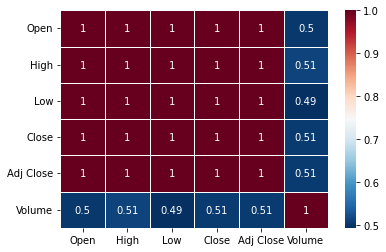

In [9]:
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

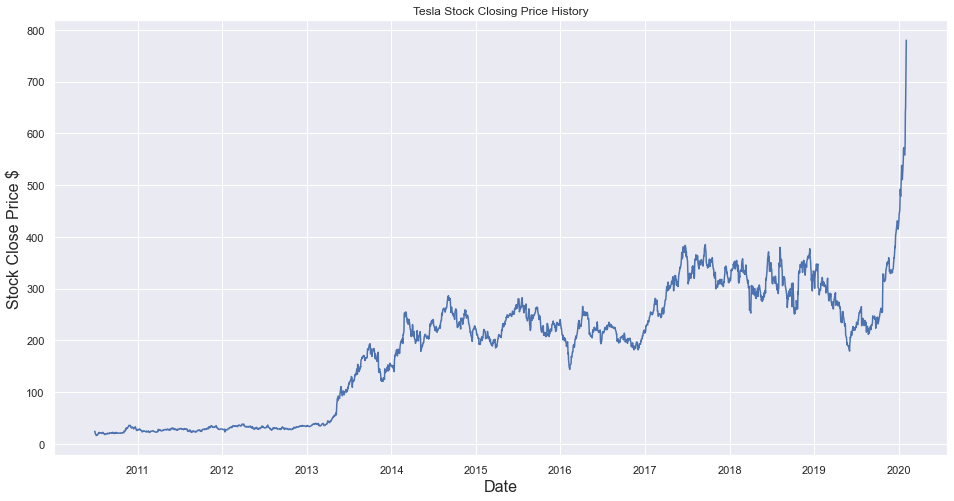

In [45]:
#Visualizing the Adjusted closing price history of Tesla Stocks
plt.figure(figsize=(16,8))
plt.title('Tesla Stock Closing Price History')
plt.plot(Tesla_df_new['Adj Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Stock Close Price $', fontsize=16)
plt.show()

#### Visualize the Dependent variable with Independent Features

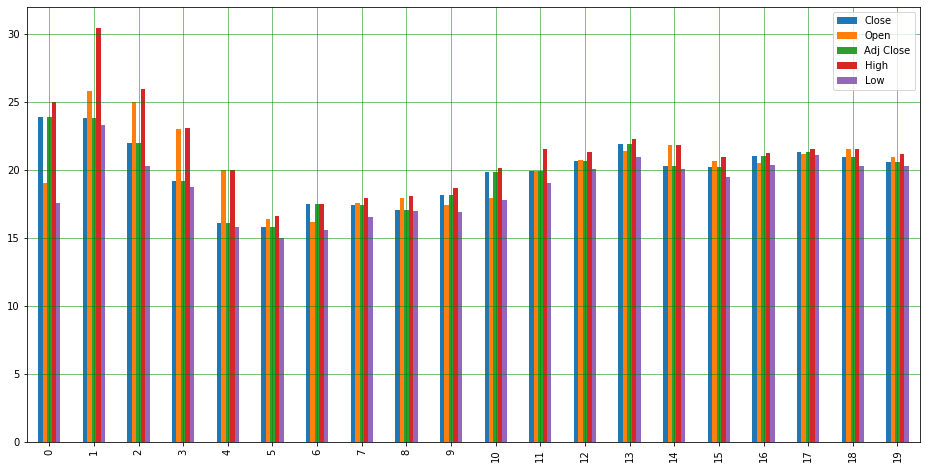

In [20]:
#Plot 
Tesla_df[['Close','Open','Adj Close','High','Low']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Model Training and Testing

In [24]:
Tesla_df['Date'] = pd.to_datetime(Tesla_df['Date'], errors='coerce')
Tesla_df['Year']=Tesla_df['Date'].dt.year
Tesla_df['Month']=Tesla_df['Date'].dt.month
Tesla_df['Day']=Tesla_df['Date'].dt.day

In [26]:
Tesla_df_new=Tesla_df[['Day','Month','Year','High','Open','Low','Close']]
Tesla_df_new.head(10)

,Day,Month,Year,High,Open,Low,Close
0,29,6,2010,25.000000,19.000000,17.540001,23.889999
1,30,6,2010,30.420000,25.790001,23.299999,23.830000
2,1,7,2010,25.920000,25.000000,20.270000,21.959999
3,2,7,2010,23.100000,23.000000,18.709999,19.200001
4,6,7,2010,20.000000,20.000000,15.830000,16.110001
5,7,7,2010,16.629999,16.400000,14.980000,15.800000
6,8,7,2010,17.520000,16.139999,15.570000,17.459999
7,9,7,2010,17.900000,17.580000,16.549999,17.400000
8,12,7,2010,18.070000,17.950001,17.000000,17.049999
9,13,7,2010,18.639999,17.389999,16.900000,18.139999


In [29]:
#separate Independent and dependent variable
X = Tesla_df_new.iloc[:,Tesla_df_new.columns !='Close']
Y= Tesla_df_new.iloc[:, 5]
print(X.shape) 
print(Y.shape)

(2416, 6)
(2416,)


In [33]:
from sklearn.model_selection import train_test_split
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3)
#x_train,x_test,y_train,y_test= train_test_split
# Test set
print(X_test.shape)

# Training set
print(X_train.shape)

(725, 6)
(1691, 6)


In [56]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [47]:
# Use model to make predictions
y_pred=model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", lin_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [-1.71838865e-16  1.09891110e-14  2.99312917e-15  2.89246869e-16
 -3.21750012e-16  1.00000000e+00]
Mean Absolute Error: 9.207898811241492e-14
Coefficient of Determination: 1.0


In [58]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(lin_model, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.99942793970781


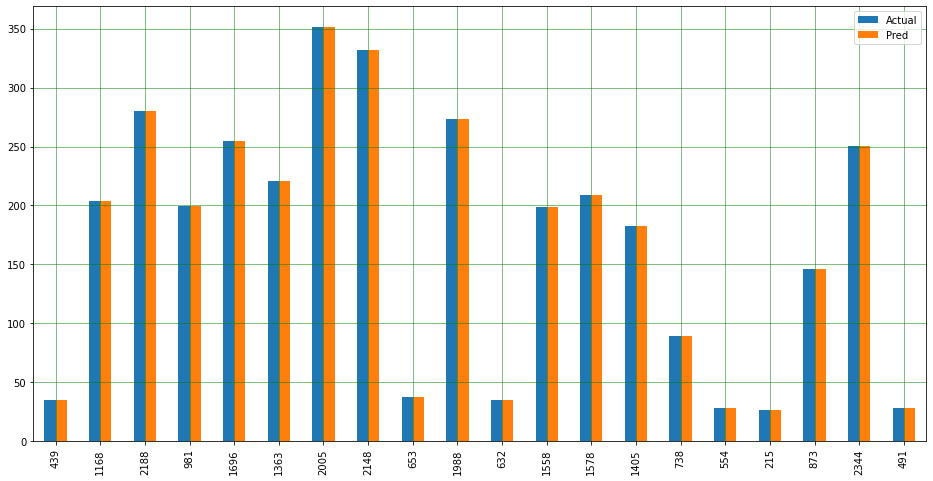

In [59]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()